In [1]:
data

NameError: name 'data' is not defined

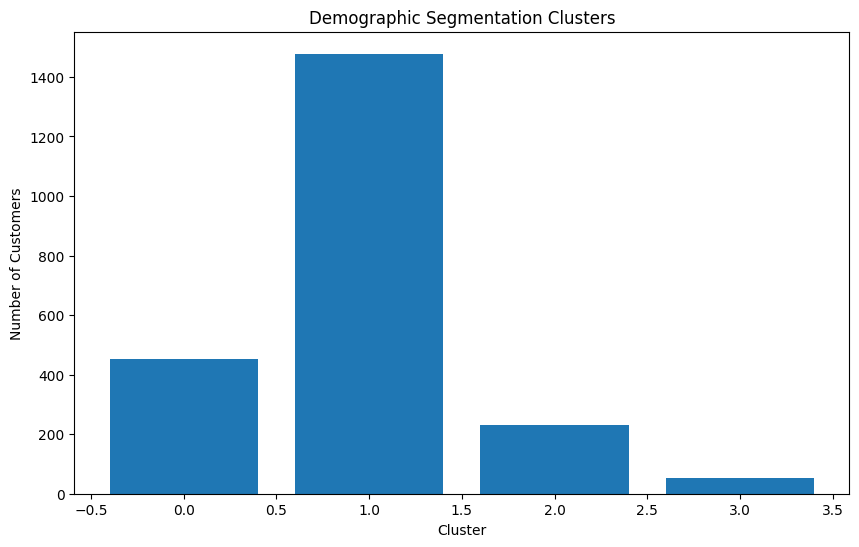

               Age        Income  Family_Size  Education_Basic  \
Cluster                                                          
0        39.878587  52296.940397     0.852097              0.0   
1        42.796346  53277.986468     0.975643              0.0   
2        44.766234  53021.614719     1.004329              0.0   
3        33.537037  20306.259259     0.722222              1.0   

         Education_Graduation  Education_Master  Education_PhD  \
Cluster                                                          
0                    0.543046          0.165563       0.211921   
1                    0.508119          0.171177       0.225304   
2                    0.515152          0.160173       0.225108   
3                    0.000000          0.000000       0.000000   

         Marital_Status_Alone  Marital_Status_Divorced  \
Cluster                                                  
0                     0.00000                 0.000000   
1                     0.00203   

In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
file_path = 'marketing_campaign.csv'
data = pd.read_csv(file_path, delimiter='\t')

# Step 1: Feature engineering
# Calculate Age from Year_Birth
current_year = 2011  # Update to the current year
data['Age'] = current_year - data['Year_Birth']

# Create Family Size feature
data['Family_Size'] = data['Kidhome'] + data['Teenhome']

# Step 2: Select demographic features
demographic_features = ['Age', 'Income', 'Education', 'Marital_Status', 'Family_Size']
demographic_data = data[demographic_features]

# Handle missing values (e.g., in Income)
demographic_data = demographic_data.dropna()

# Step 3: Encode categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Updated here
encoded_categorical = encoder.fit_transform(demographic_data[['Education', 'Marital_Status']])
encoded_columns = encoder.get_feature_names_out(['Education', 'Marital_Status'])

# Combine encoded variables with numerical features
numerical_features = ['Age', 'Income', 'Family_Size']
processed_data = pd.concat(
    [demographic_data[numerical_features].reset_index(drop=True),
     pd.DataFrame(encoded_categorical, columns=encoded_columns)],
    axis=1
)

# Step 4: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(processed_data)

# Step 5: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
processed_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Add clusters to the original dataset
data['Cluster'] = None
data.loc[demographic_data.index, 'Cluster'] = processed_data['Cluster']

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.bar(processed_data['Cluster'].value_counts().index,
        processed_data['Cluster'].value_counts().values)
plt.title('Demographic Segmentation Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

# Step 7: Save results and analyze clusters
data.to_csv("demographic_segmentation_results.csv", index=False)
print(processed_data.groupby('Cluster').mean())
